# Assignment 1

This is due in on Friday **November 6th before 2pm**. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub **after** having run all cells with `Runtime`->`Restart and run all`.

_It is recommended to only attempt this assignment after having gone through the week4 sheet._

For the first assignment you will read in some Raman data from the file [pristine1.txt](https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt). The data consists of two columns of numbers taken by reflecting laser radiation (at a wavelength of $532 nm$) from a single layer of graphene which has been deposited on the surface of silicon. 
You might imagine that the reflected light would all be at $532 nm$, but non-linear effects in the graphene mean that various peaks are seen away from this wavelength; these are related to the elastic properties of the graphene structure in response to the electric field of the light.
The columns record the reflectance (in arbitrary units) of the graphene as a function of wave length shift $\Delta\lambda$ away from the laser excitation wave length. (Actually, $\Delta(1/\lambda)$ - called the Raman shift - is recorded, so the units are $1/cm$, also known as ’wavenumber’.)

1. [2] Read in and plot the raw data, use `wget` in the notebook to get the data, so that when running it from scratch it gets the data itself.
2. [8] Raman data are normally plotted with the curved background removed, to show the peaks more clearly. Do this. You must fit the background function only to the data regions without a peak. Make a plot of your fit over the data, and a plot of the data with the background removed. _Hint: You will need to decide what background function is appropriate._
3. [10] Fit the double peak structure around $2450$ and $2660$ wavenumbers. Don’t fit them separately, but define a ’double Gaussian’ function and use that do do the fit. (The very sharp peak near $2340\,1/cm$ can be ignored.)
_Hint: You can do this fit to the raw data if you wish - i.e. it’s not required to remove the background unless you’d prefer to do so._

In [1]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt


No handles with labels found to put in legend.


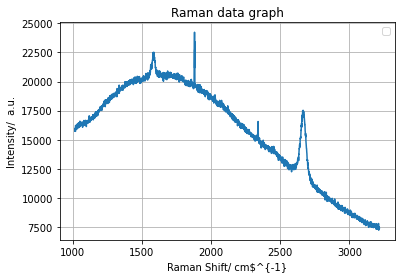

In [3]:
f = open('pristine1.txt', 'r')
raman_shift, intensity = np.loadtxt("pristine1.txt", skiprows = 4, unpack=True)
# unpacks the data into two arrays

#plot data
plt.plot(raman_shift, intensity)
plt.xlabel('Raman Shift/ cm$^{-1}')
plt.ylabel('Intensity/  a.u.')
plt.title('Raman data graph')
plt.legend()
plt.grid()

In [4]:
pip install rampy

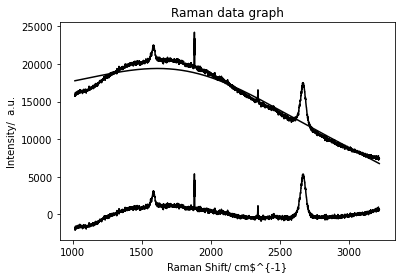

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import rampy as rp

raman_shift, intensity = np.loadtxt("pristine1.txt", skiprows = 4, unpack=True)

bir = np.array([[1000., 1500.], [2000., 2250.], [2750.,3000.]]) # the frequency regions devoid of signal, used by rp.baseline()

y_corrected, background = rp.baseline(raman_shift,intensity, bir,"arPLS",lam=10**10)

plt.figure()
plt.plot(raman_shift,intensity,"k",label="raw data")
plt.plot(raman_shift,background,"k",label="background")
plt.plot(raman_shift,y_corrected,"k",label="corrected signal")
plt.xlabel('Raman Shift/ cm$^{-1}')
plt.ylabel('Intensity/  a.u.')
plt.title('Raman data graph')
plt.show()



Text(0.5, 1.0, 'Raman data double gaussian fit graph')

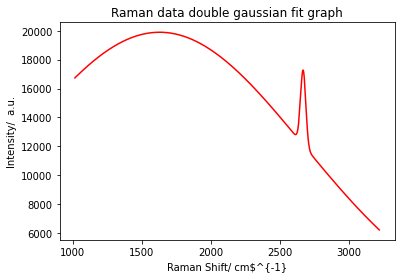

In [7]:
import matplotlib.pyplot
import matplotlib.mlab
import numpy as np
from pylab import *
from scipy.optimize import leastsq

raman_shift, intensity = np.loadtxt("pristine1.txt", skiprows = 4, unpack=True)


def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    peak1 =   c1 * np.exp( - (raman_shift - mu1)**2.0 / (2.0 * sigma1**2.0) )
    peak2 = c2 * np.exp( - (raman_shift - mu2)**2.0 / (2.0 * sigma2**2.0) )
    res = peak1+peak2
    return res
  

def double_gaussian_fit( params ):
    fit = double_gaussian( raman_shift, params )
    return (fit - y_proc)

# Remove background.
y_proc = np.copy(intensity)
y_proc[y_proc < 5] = 0.0

# Least squares fit. Starting values found by inspection.
fit = leastsq( double_gaussian_fit, [500,2460,10,5000,2660,20])
#plot( raman_shift, intensity, c='b' )
plt.plot( raman_shift, double_gaussian( raman_shift, fit[0] ), c='r' )
plt.xlabel('Raman Shift/ cm$^{-1}')
plt.ylabel('Intensity/  a.u.')
plt.title('Raman data double gaussian fit graph')